# 1912년 타이타닉 사고 데이터 EDA
![image.png](attachment:image.png)
#### 탐색적 데이터 분석 (EDA)를 통해 아래 목표를 달성해봅시다 
- 주어진 각 feature들의 분포 살펴보기, 생존자/사망자 별로 데이터 분리하여 살펴보기
- 어떤 정보를 통해 **생존율을 예측**할 수 있을 지, 가설을 세우고 실제 그래프로 검증해봅시다.

### [ 데이터 설명 ]
- 891명의 승객에 대한 데이터.  생존여부 / 좌석 등급 / 성별 / 나이 / 일행 / 자녀 / 운임 등의 feature

|Feature|	Definition|	Value|
|------|---------|------------|
|survived|	생존 여부|	0 = No, 1 = Yes|
|pclass|	티겟 등급 (1등석, 2등석, 3등석)|	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|	성별	| male 남성,  female 여성
|age|	나이  |	((숫자))
|sibsp|	함께 탑승한 배우자, 형제자매의 수 합	|   ((숫자))
|parch|	함께 탑승한 부모님, 자녀의 수 합	|   ((숫자))
|fare|	운임 요금 (티켓 가격)	|   ((숫자))
|embarked|	출항지 (한글자)	|C = Cherbourg, Q = Queenstown, S = Southampton|
|class|	티켓 등급 (단어로)	|  First, Second, Third
|who|	남성/여성/아이 구분	|    man, woman, child
|adult_male|	성인 남성인지의 여부	|    True, False
|deck|	선박에서 배정받은 좌석의 구역	|    A, B, C, D, E, F, G, 빈 값
|embark_town|	출항지 (풀네임)	|   ((도시이름))
|alive|	생존 여부	|    yes, no
|alone|	혼자인지 여부	|    True, False

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
titanic_df = sns.load_dataset('titanic')
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
titanic_df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [11]:
category_cols = ['sex','embarked','class','who','adult_male','deck','embark_town','alive','alone']

In [12]:
category_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [9]:
numerical_cols = ['age', 'sibsp', 'parch', 'fare']

In [13]:
numerical_cols

['age', 'sibsp', 'parch', 'fare']

데이터 통계량 살펴보기
.descibe() 함수로 각 열에 대한 대력적인 통계 값들을 확인할 수 있음

In [14]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# .value_counts()를 통해 각 컬럼별로 몇 개의 row가 있는지 확인
for col in category_cols:
    print(col + ' 카운트::')
    print(titanic_df.loc[:, col].value_counts())
    print()

sex 카운트::
male      577
female    314
Name: sex, dtype: int64

embarked 카운트::
S    644
C    168
Q     77
Name: embarked, dtype: int64

class 카운트::
Third     491
First     216
Second    184
Name: class, dtype: int64

who 카운트::
man      537
woman    271
child     83
Name: who, dtype: int64

adult_male 카운트::
True     537
False    354
Name: adult_male, dtype: int64

deck 카운트::
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

embark_town 카운트::
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

alive 카운트::
no     549
yes    342
Name: alive, dtype: int64

alone 카운트::
True     537
False    354
Name: alone, dtype: int64



#### 데이터의 분포 눈으로 살펴보기
수치형 컬럼들의 분포를 그려봅시다. 통계량은 boxplot으로 살펴보고, 분포는 histplot으로 그립니다.  
* 본격적으로 반복문을 사용해 볼까요? 이 코드에서는 반복문을 이용하여 여러개의 차트를 그립니다.
* plt.subplots를 통해 여러 개의 도화지를 생성합니다. (nrows × ncols)
* for문 안에서는 각 도화지(ax)에 seaborn으로 차트를 그립니다. figure는 그림 전체를 의미합니다.

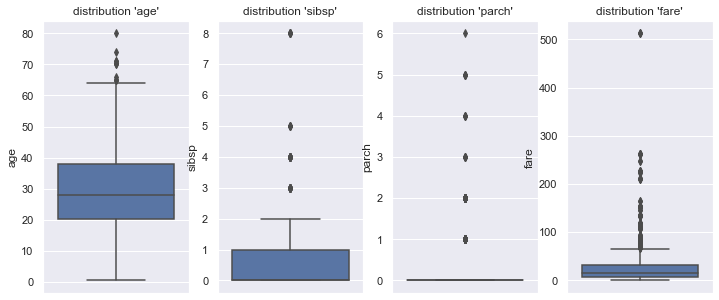

In [17]:
figure, ax_list = plt.subplots(nrows=1, ncols = 4)
figure.set_size_inches(12, 5)

for i in range(4):
    col = numerical_cols[i]
    sns.boxplot(data = titanic_df, y = col, showfliers = True, ax = ax_list[i])
    ax_list[i].set_title(f"distribution '{col}'")
# showfliers = True -> 이상값 표현을 함

범주형 컬럼들의 분포를 그려봅니다. 범주형이므로 countplot을 통해 각 범주별로 개수를 셀 수 있습니다.  
* 범주형 컬럼이 총 9개 이므로, 3x3 도화지 레이아웃으로 하나씩 그래프를 그려봅니다.
* ax_list_list는 [[], []] 형태의 2차원 리스트 입니다. for 문으로 반복하기 위해 1차원 리스트로 풀어줍니다.
* 1차원 리스트 ax_list가 9개의 도화지 (ax)를 갖도록 풀어서 할당하는데, `.reshape()` 라는 numpy 함수를 사용합니다.

(3, 3)
(9,)


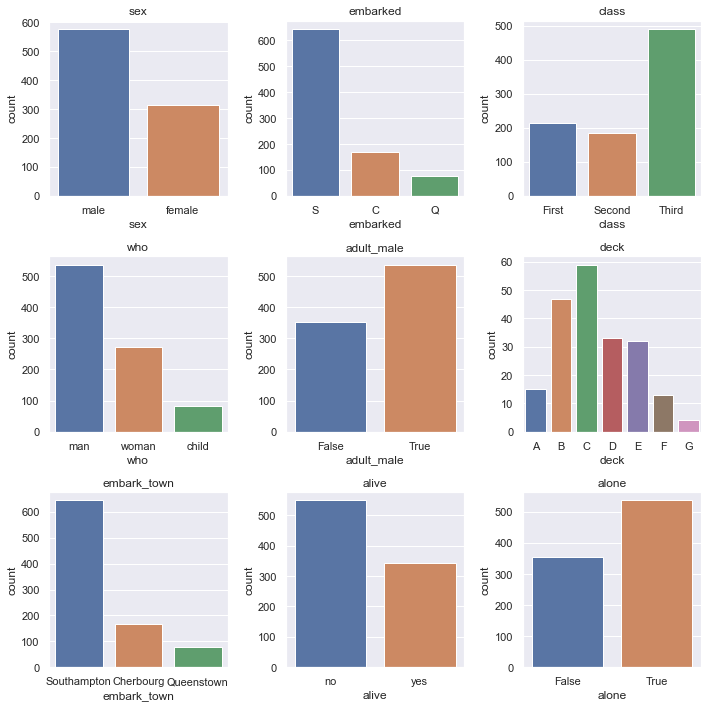

In [19]:
figure, ax_list_list = plt.subplots(nrows = 3, ncols = 3);
figure.set_size_inches(10, 10)

ax_list = ax_list_list.reshape(9)
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(category_cols)):
    col = category_cols[i]
    sns.countplot(data=titanic_df, x=col, ax = ax_list[i])
    ax_list[i].set_title(col)
    
plt.tight_layout()

#### 데이터로부터 유의미한 정보 발굴하기  
사실, 여기서부터는 EDA의 범위를 넘어섭니다. 그래도 탑승객의 '생존'에 어떤 것들이 영향을 미치는지 궁금하시죠?  
몇 가지 가설을 세우고 그래프를 그려 '생존'에 영향을 미치는 요인이 무엇인지 살펴봅시다

#### 성별과 생존 여부

<AxesSubplot:xlabel='sex', ylabel='count'>

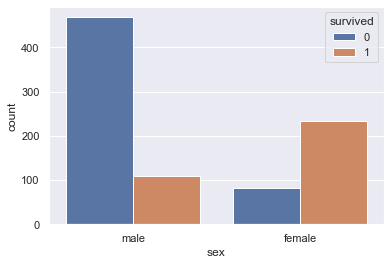

In [21]:
sns.countplot(data = titanic_df, x = 'sex', hue = 'survived')

#### 좌석 등급과 생존 여부

<AxesSubplot:xlabel='pclass', ylabel='count'>

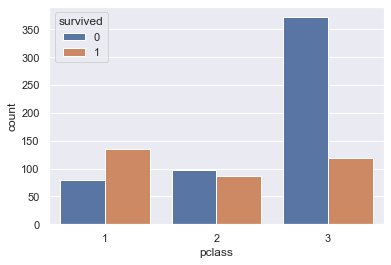

In [22]:
sns.countplot(data = titanic_df, x = 'pclass', hue = 'survived')

#### 9개의 범주형 분류에 대해, 생존 여부로 그래프 그리기

(3, 3)
(9,)


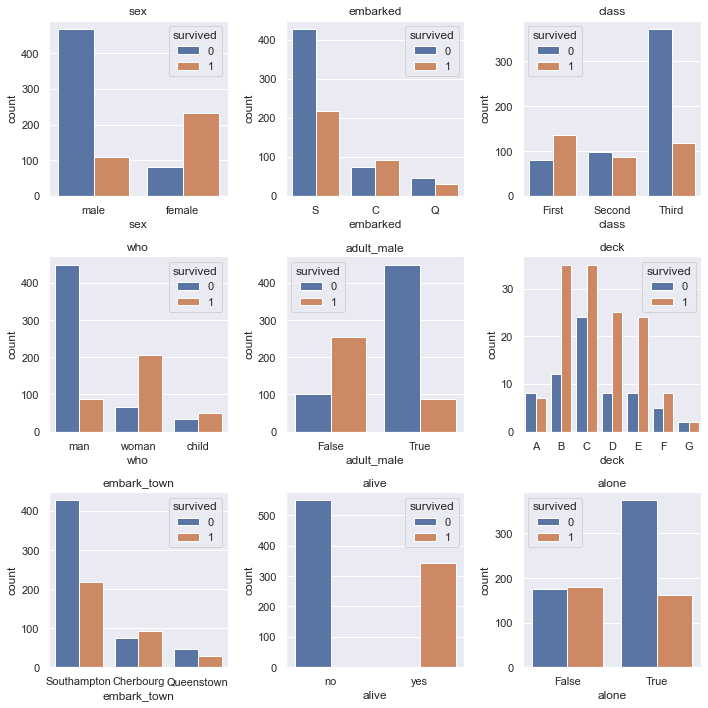

In [33]:
figure, ax_list_list = plt.subplots(nrows=3, ncols = 3);
figure.set_size_inches(10,10)

ax_list = ax_list_list.reshape(9)
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(category_cols)):
    col = category_cols[i]
    sns.countplot(data = titanic_df, x = col, ax = ax_list[i], hue = 'survived')
    ax_list[i].set_title(col)

plt.tight_layout()

#### 배우자 + 형제자매의 수, 생존 여부 별 나이의 boxplot

<AxesSubplot:xlabel='parch', ylabel='age'>

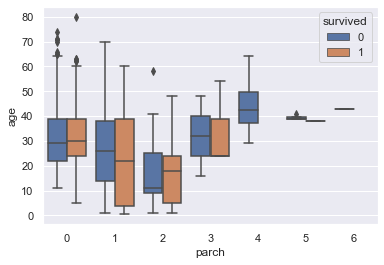

In [32]:
sns.boxplot(data = titanic_df, x = 'parch', y = 'age', hue = 'survived')

#### 데이터 분석 결과를 통해 얻은 결론을 정리

In [ ]:
# 1등석 > 2등석 > 3등석 생존확률 높다
# 여자 or 어린이 > 남자 생존확률 높다